In [10]:
# Import required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Reading the raw dataframe

raw_df = pd.read_csv('../data/raw/raw_df.csv', index_col=0)
raw_df

,id,type,created_at,actor_id,repo_id
0,27783644894,ForkEvent,2023-03-17 00:00:00+00:00,17995064,428766351
1,27783644779,CreateEvent,2023-03-17 00:00:00+00:00,127647168,615093098
2,27783644786,PushEvent,2023-03-17 00:00:00+00:00,29139614,440626732
3,27783644790,PullRequestEvent,2023-03-17 00:00:00+00:00,39814207,495229751
4,27783644803,PullRequestEvent,2023-03-17 00:00:00+00:00,29139614,591435512
...,...,...,...,...,...
937983,27808996323,ForkEvent,2023-03-17 23:59:59+00:00,128193968,110908517
937984,27808996316,PushEvent,2023-03-17 23:59:59+00:00,95265085,449896446
937985,27808996319,PushEvent,2023-03-17 23:59:59+00:00,37929162,363543354
937986,27808996338,CreateEvent,2023-03-17 23:59:59+00:00,49699333,464789287


In [12]:
# Filter the data to remove the bot activities

raw_df['count'] = raw_df.groupby('actor_id')['actor_id'].transform('count')
filtered_df = raw_df.query("count >= 1 & count <= 30")
filtered_df = filtered_df.drop('count', axis=1)
filtered_df

,id,type,created_at,actor_id,repo_id
0,27783644894,ForkEvent,2023-03-17 00:00:00+00:00,17995064,428766351
5,27783644807,PushEvent,2023-03-17 00:00:00+00:00,122577200,615084518
6,27783644810,IssueCommentEvent,2023-03-17 00:00:00+00:00,19270322,7833168
7,27783644818,PushEvent,2023-03-17 00:00:00+00:00,125618574,615081797
8,27783644834,PushEvent,2023-03-17 00:00:00+00:00,54393192,481770341
...,...,...,...,...,...
937973,27808996276,PushEvent,2023-03-17 23:59:59+00:00,80122856,474133664
937975,27808996279,PushEvent,2023-03-17 23:59:59+00:00,125478830,612007449
937983,27808996323,ForkEvent,2023-03-17 23:59:59+00:00,128193968,110908517
937984,27808996316,PushEvent,2023-03-17 23:59:59+00:00,95265085,449896446


In [13]:
# Pivot the data to the count of event for clustering

pivot_df = pd.pivot_table(filtered_df, values='id', index='actor_id', columns='type', aggfunc=len, fill_value=0)

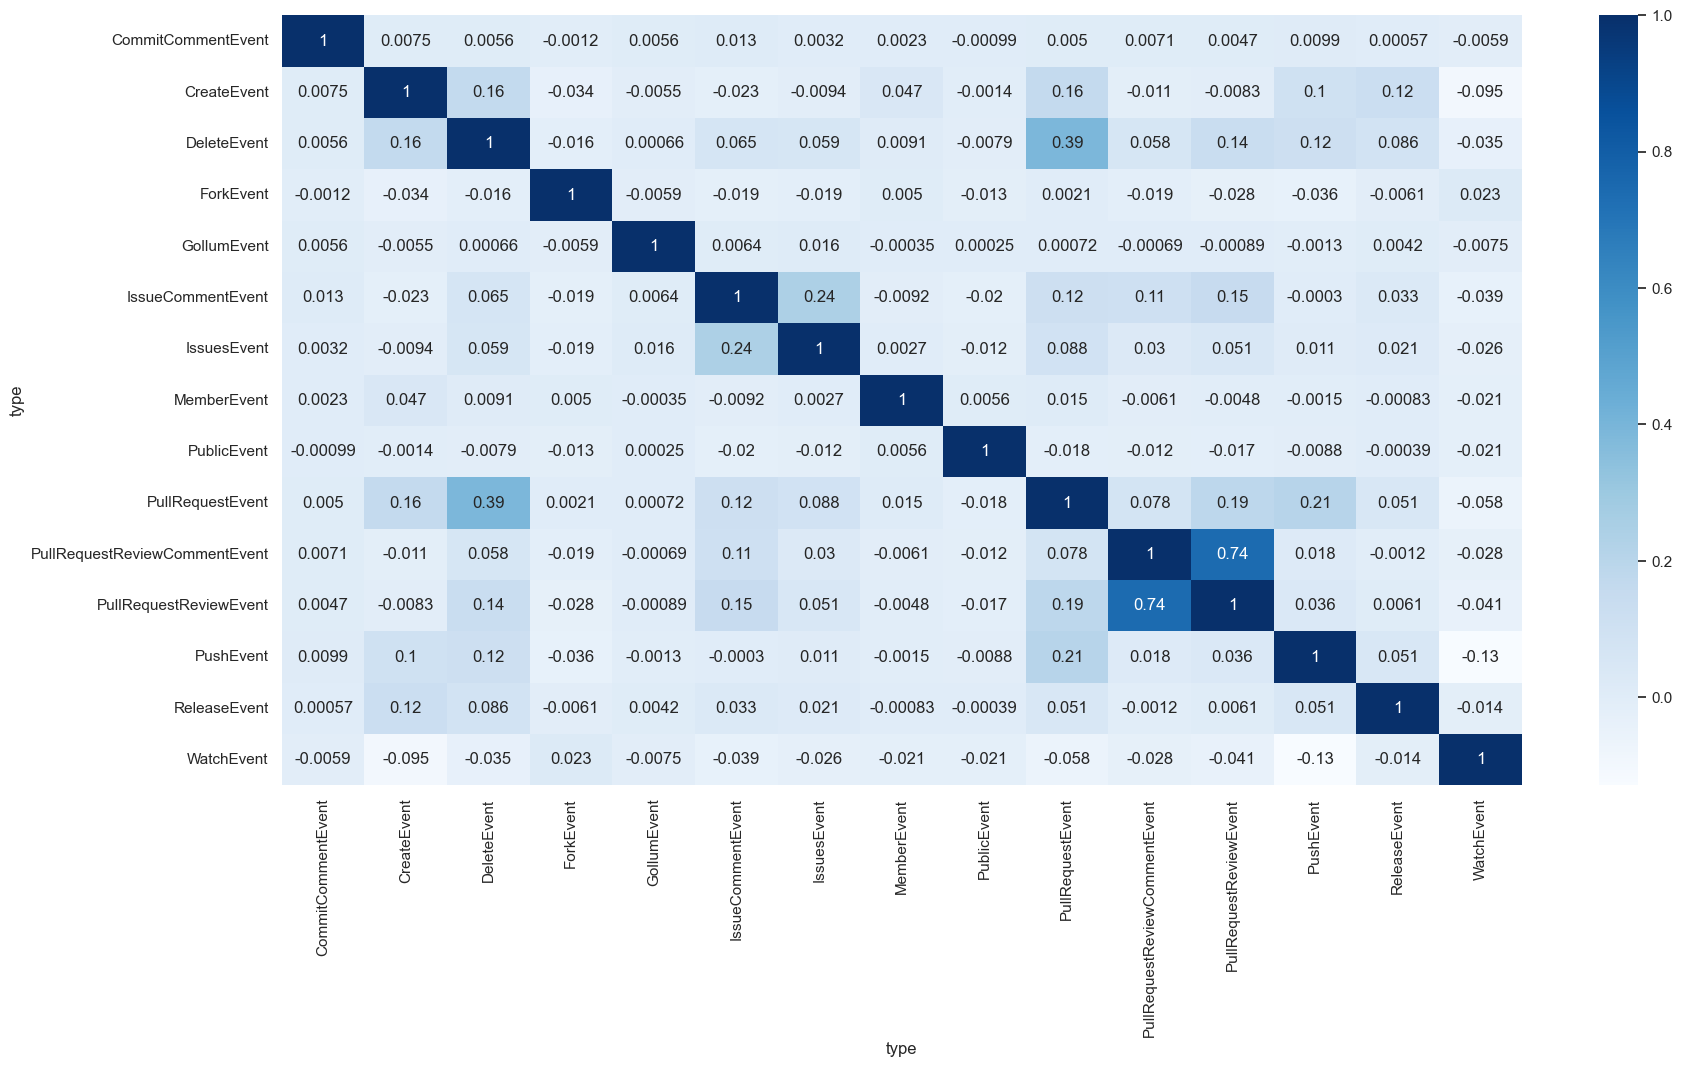

In [14]:
# Evaluate the hidden correlation to investigate probable 

cor = pivot_df.corr()
plt.figure(figsize=(20, 10))
sns.set(font_scale=1)
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues);

In [15]:
# Feature reduction to avoid multicollinearity

pivot_df = pivot_df[['CreateEvent',
                     'ForkEvent',
                     'IssuesEvent',
                     'PullRequestEvent',
                     'PullRequestReviewEvent',
                     'PushEvent',
                     'ReleaseEvent',
                     'WatchEvent']]

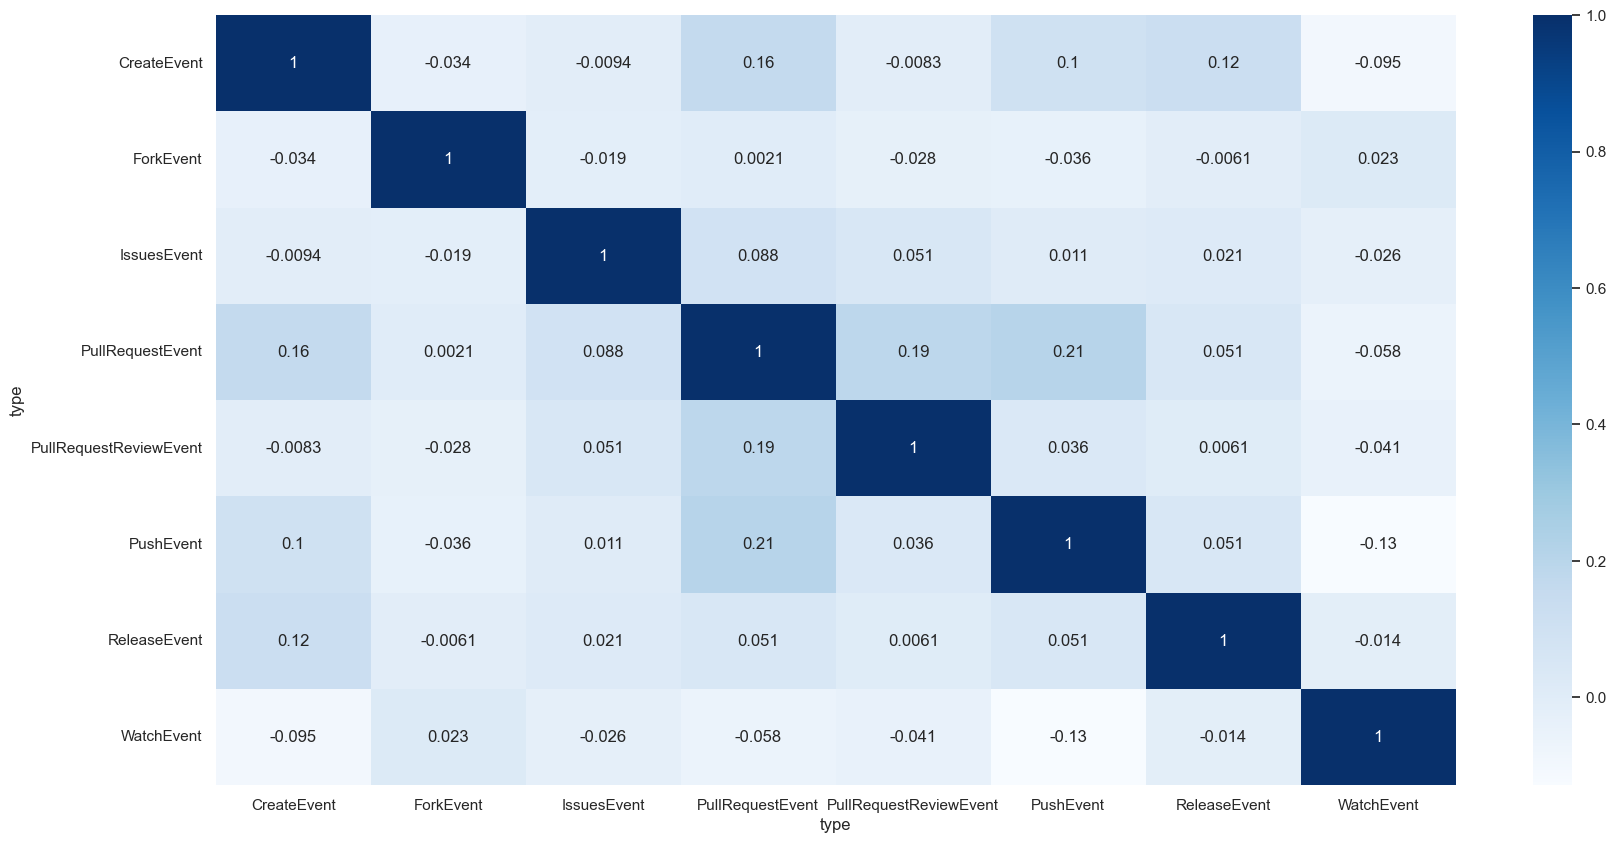

In [16]:
cor = pivot_df.corr()
plt.figure(figsize=(20, 10))
sns.set(font_scale=1)
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues);

In [17]:
pivot_df.to_csv('../data/processed/processed_ml.csv')